# EDA 학습과제1 - 스타벅스 이디야 매장 데이터 분석

In [7]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.1 MB/s eta 0:00:00a 0:00:01
  Using cached numpy-1.24.2-cp310-cp310-macosx_11_0_arm64.whl (13.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0

[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 마이너스 부호 때문에 한글이 깨질 수가 있어 주는 설정
plt.rcParams["axes.unicode_minus"] = False
rc("font", family="Arial Unicode MS")
# %matplotlib inline
get_ipython().run_line_magic("matplotlib","inline")

In [14]:
# import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file = "../data/소상공인시장진흥공단_상가(상권)정보_서울_202212.csv"
df = pd.read_csv(file, encoding='utf-8',engine='python')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375


In [12]:
print(len(df.columns))
list(df.columns)

39


['상가업소번호',
 '상호명',
 '지점명',
 '상권업종대분류코드',
 '상권업종대분류명',
 '상권업종중분류코드',
 '상권업종중분류명',
 '상권업종소분류코드',
 '상권업종소분류명',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드',
 '시도명',
 '시군구코드',
 '시군구명',
 '행정동코드',
 '행정동명',
 '법정동코드',
 '법정동명',
 '지번코드',
 '대지구분코드',
 '대지구분명',
 '지번본번지',
 '지번부번지',
 '지번주소',
 '도로명코드',
 '도로명',
 '건물본번지',
 '건물부번지',
 '건물관리번호',
 '건물명',
 '도로명주소',
 '구우편번호',
 '신우편번호',
 '동정보',
 '층정보',
 '호정보',
 '경도',
 '위도']

In [16]:
dataset = df[['상호명','시군구명','위도','경도','상권업종중분류명']]
dataset.head()

,상호명,시군구명,위도,경도,상권업종중분류명
0,제중건강원,영등포구,37.520613,126.907168,건강/미용식품
1,민속악기사,성동구,37.566857,127.049018,취미/오락관련소매
2,태평양진주,종로구,37.571848,126.993530,시계/귀금속소매
3,김선희꼼꼼국어교습소,송파구,37.510967,127.121520,학원-보습교습입시
4,비지트,서초구,37.488375,126.991394,한식


In [17]:
dataset["상호명"] = dataset["상호명"].str.lower()

/var/folders/v9/r_sm5t7x2t5gc1b5ry34_lj80000gn/T/ipykernel_29359/473782440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["상호명"] = dataset["상호명"].str.lower()


In [23]:
df_coffee = dataset[(dataset['상권업종중분류명'] == '커피점/카페')]
df_coffee.index = range(len(df_coffee))
df_coffee.head()

,상호명,시군구명,위도,경도,상권업종중분류명
0,커피빈,종로구,37.583149,127.000171,커피점/카페
1,요거프레소,도봉구,37.658728,127.034746,커피점/카페
2,우성커피숍,양천구,37.522055,126.842935,커피점/카페
3,버블베어,강서구,37.580941,126.813358,커피점/카페
4,알뤼르,강남구,37.504378,127.054731,커피점/카페


In [48]:
df_coffee.loc[df_coffee['상호명'].str.contains('이디야|이디아|ediya'),"브랜드명"]="이디야"
df_coffee.loc[df_coffee['상호명'].str.contains('스타벅스|starbucks'),"브랜드명"]="스타벅스"
df_coffee = df_coffee[ (df_coffee["브랜드명"]=="이디야") | (df_coffee["브랜드명"]=="스타벅스")]
df_coffee.head()

/var/folders/v9/r_sm5t7x2t5gc1b5ry34_lj80000gn/T/ipykernel_29359/2312104498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee.loc[df_coffee['상호명'].str.contains('이디야|이디아|ediya'),"브랜드명"]="이디야"


,상호명,시군구명,위도,경도,상권업종중분류명,브랜드명
21,이디야커피,영등포구,37.515118,126.918062,커피점/카페,이디야
34,이디야커피,영등포구,37.519544,126.939198,커피점/카페,이디야
35,스타벅스,종로구,37.582964,127.003887,커피점/카페,스타벅스
61,이디야커피양재at점,서초구,37.469075,127.040265,커피점/카페,이디야
63,이디야커피,금천구,37.449066,126.913646,커피점/카페,이디야


## 문제1 - 서울시의 스타벅스 매장의 이름과 주소, 구 이름을 dataframe으로 정리

In [28]:
df_sta = df_coffee[df_coffee['상호명'].str.contains('스타벅스')]
df_sta.index = range(len(df_sta))
print('서울시 내 스타벅스 점포 수 :', len(df_sta))
df_sta.head()

서울시 내 스타벅스 점포 수 : 464


,상호명,시군구명,위도,경도,상권업종중분류명
0,스타벅스,종로구,37.582964,127.003887,커피점/카페
1,스타벅스남부터미널2점,서초구,37.484386,127.014198,커피점/카페
2,스타벅스,양천구,37.527147,126.874682,커피점/카페
3,스타벅스미아사거리역점,강북구,37.611841,127.030685,커피점/카페
4,스타벅스,강남구,37.523184,127.021629,커피점/카페


In [72]:
sta_gu = df_sta.groupby('시군구명')['상호명'].count().to_frame().sort_values(by="상호명",ascending=False)
sta_gu = sta_gu.reset_index()
sta_gu

,시군구명,상호명
0,강남구,76
1,중구,42
2,서초구,38
3,송파구,33
4,종로구,28
5,영등포구,27
6,마포구,26
7,용산구,18
8,강서구,16
9,서대문구,16


In [73]:
sta_gu.columns=['시군구명','매장수']
sta_gu.head(1)

,시군구명,매장수
0,강남구,76


In [74]:
sta_gu['위도'] = df_sta['위도']
sta_gu['경도'] = df_sta['경도']
sta_gu.head(1)

,시군구명,매장수,위도,경도
0,강남구,76,37.582964,127.003887


## 문제2 - 서울시의 이디야 매장의 이름과 주소, 구 이름을 dataframe으로 정리

In [26]:
df_edi = df_coffee[df_coffee['상호명'].str.contains('이디야')]
df_edi.index = range(len(df_edi))
print('서울시 내 이디야 점포 수 :', len(df_edi))
df_edi.head()

서울시 내 이디야 점포 수 : 442


,상호명,시군구명,위도,경도,상권업종중분류명
0,이디야커피,영등포구,37.515118,126.918062,커피점/카페
1,이디야커피,영등포구,37.519544,126.939198,커피점/카페
2,이디야커피양재at점,서초구,37.469075,127.040265,커피점/카페
3,이디야커피,금천구,37.449066,126.913646,커피점/카페
4,이디야커피,구로구,37.486436,126.854872,커피점/카페


In [65]:
edi_gu = df_edi.groupby('시군구명')['상호명'].count().to_frame().sort_values(by="상호명",ascending=False)
edi_gu = edi_gu.reset_index()
edi_gu

,시군구명,상호명
0,강서구,33
1,송파구,29
2,강남구,27
3,영등포구,23
4,관악구,22
5,마포구,21
6,금천구,19
7,은평구,19
8,구로구,18
9,노원구,18


In [66]:
edi_gu.columns=['시군구명','매장수']
edi_gu.head(1)

,시군구명,매장수
0,강서구,33


In [75]:
edi_gu['위도'] = df_edi['위도']
edi_gu['경도'] = df_edi['경도']
edi_gu.head(1)

,시군구명,매장수,위도,경도
0,강서구,33,37.515118,126.918062


### 지도에 표현하기

In [34]:
pip install folium

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)

[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
import folium
import json

In [37]:
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [39]:
df_sta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       464 non-null    object 
 1   시군구명      464 non-null    object 
 2   위도        464 non-null    float64
 3   경도        464 non-null    float64
 4   상권업종중분류명  464 non-null    object 
dtypes: float64(2), object(3)
memory usage: 18.2+ KB


In [56]:
lat = df_sta['위도'].mean()
lng = df_sta['경도'].mean()
new_map=folium.Map(location=[lat,lng],zoom_start=12)

for i in df_coffee.index:
  sub_lat=df_coffee.loc[i,"위도"]
  sub_long = df_coffee.loc[i,"경도"]

  title = f"{df_coffee.loc[i,'상호명']}-{df_coffee.loc[i,'시군구명']}"
  if df_coffee.loc[i,"브랜드명"]=="스타벅스":
    color = "green"
  else :
    color = "blue"
  folium.CircleMarker([sub_lat,sub_long],radius=3,color=color,tooltip=title).add_to(new_map) #마우스 댔을 때 tooltip으로 

new_map

### 스타벅스 폴리곤지도 

In [79]:
m=folium.Map(location=[lat,lng],zoom_start=11)
folium.Choropleth(
    geo_data=geo_str,
    data=sta_gu,
    columns=["시군구명","매장수"],
    key_on = "feature.properties.name",
    fill_color="YlGn",
    fill_opacity = 0.7 
).add_to(m)
m

### 이디야 폴리곤지도

In [80]:
m=folium.Map(location=[lat,lng],zoom_start=11)
folium.Choropleth(
    geo_data=geo_str,
    data=edi_gu,
    columns=["시군구명","매장수"],
    key_on = "feature.properties.name",
    fill_color="YlGn",
    fill_opacity = 0.7 
).add_to(m)
m

### 스타벅스와 이디야 구별 비교

<AxesSubplot: xlabel='경도', ylabel='위도'>

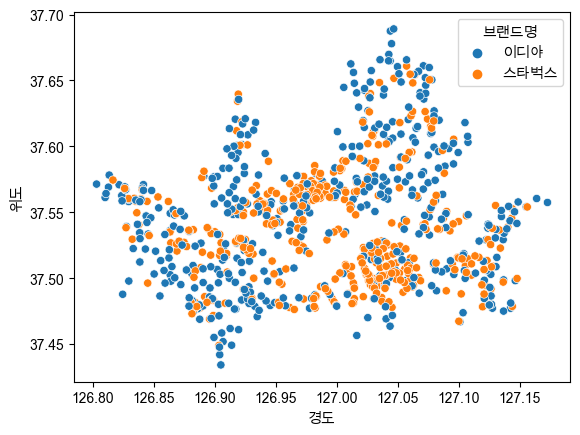

In [51]:
sns.scatterplot(data=df_coffee,x='경도',y='위도',hue='브랜드명')

<AxesSubplot: xlabel='시군구명', ylabel='count'>

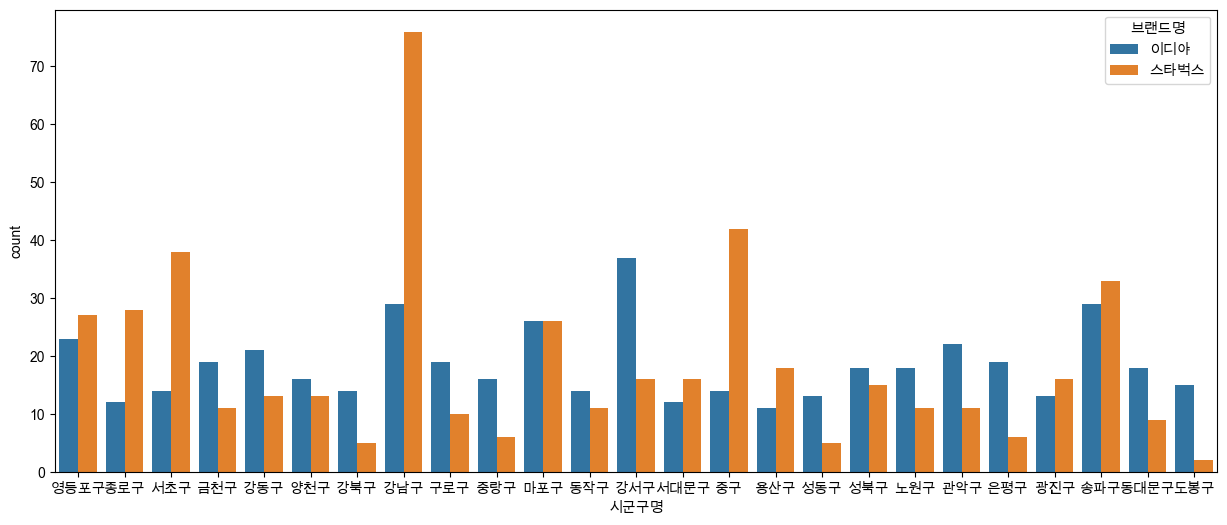

In [50]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_coffee,x='시군구명',hue='브랜드명')

스타벅스와 이디야를 비교해봤을 때 서로 가까이 있지도 않을 뿐더러 시군구 별로 매장수도 서로 너무나도 다르다.
따라서 스타벅스와 이디야는 서로 매장 근처에 있지 않다.